In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np
import json
from Bio import SeqIO
import scipy.stats
from augur.utils import json_to_tree
from collections import Counter

In [81]:
stop_vs_nonsyn_file = 'stop_vs_nonsyn/stop_mut_and_host_info_by_tip.json'
#read in the tree
with open(stop_vs_nonsyn_file, 'r') as f:
    stop_vs_nonsyn = json.load(f)

In [82]:
all_genes = ["Nsp1",
                 "Nsp2",
                 "Nsp3",
                 "Nsp4",
                 "Nsp5",
                 "Nsp6",
                 "Nsp7",
                 "Nsp8",
                 "Nsp9",
                 "Nsp10",
                 "RdRp",
                 "Hel",
                 "ExoN",
                 "NendoU",
                 "2Omethyltransferase",
                 "S1",
                 "S2",
                 "Orf3",
                 "Orf4a",
                 "Orf4b",
                 "Orf5",
                 "E",
                 "M",
                 "Orf8b",
                 "N"
                 ]

def get_stops(mut_and_host_info_by_tip):
    stops_per_gene = {}
    for tip, info in mut_and_host_info_by_tip.items():
        muts_on_path = info.get('muts_on_path', {})
        for gene in muts_on_path.keys(): 
            if gene not in stops_per_gene:
                stops_per_gene[gene] = {}
            for m in muts_on_path[gene]:
                if m not in stops_per_gene[gene]:
                    stops_per_gene[gene][m] = 1
                else:
                    stops_per_gene[gene][m] += 1
    return stops_per_gene

stops = get_stops(stop_vs_nonsyn)
print(stops)

num_stops = []
for gene in all_genes:
    if gene not in stops.keys():
        num_stops.append(0)
    else:
        num_stops.append(len(stops[gene]))

{'Orf4b': {'R206X': 23, '*247X': 23, 'W67X': 15, 'Y68X': 15, 'K83X': 15, 'Y85X': 15, 'Q15X': 2, 'L125X': 1, 'N65X': 1}, 'Nsp2': {'L117X': 1}, 'S1': {'G60X': 1}, 'Orf3': {'S92X': 12, 'D97X': 12, 'Y100X': 12, 'N103X': 12, '*104X': 42, 'P86X': 1, 'H89X': 21, 'F96X': 19, 'S101X': 8, 'T87X': 11, 'D85X': 10}, 'Nsp3': {'I186X': 2, 'A187X': 2}, 'Orf5': {'L7X': 1, 'F8X': 1, '*225X': 1}}


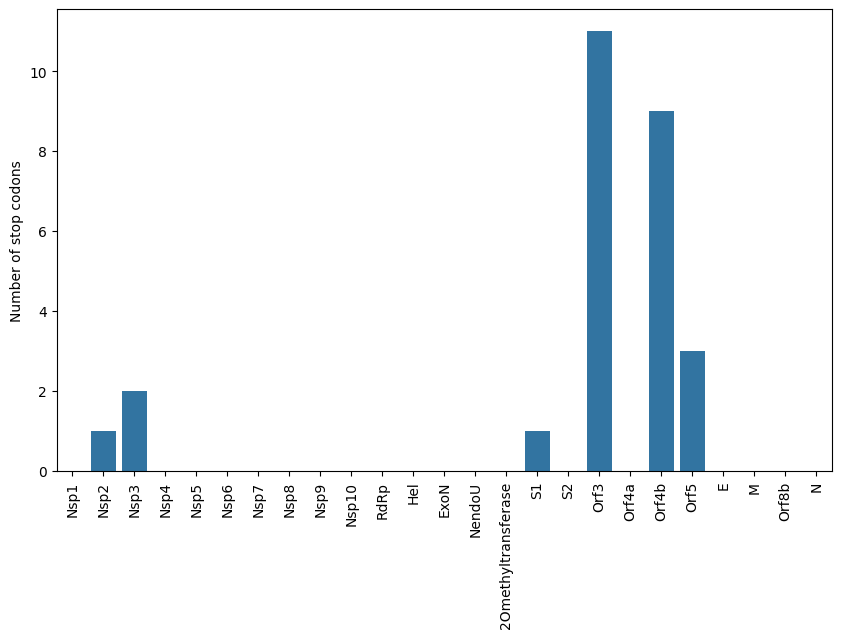

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x=all_genes, y=num_stops)
plt.ylabel('Number of stop codons')
plt.xticks(rotation=90)
plt.show()